# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [2]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale


Pretty printing has been turned OFF


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

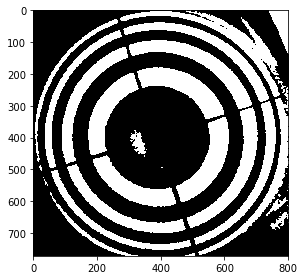

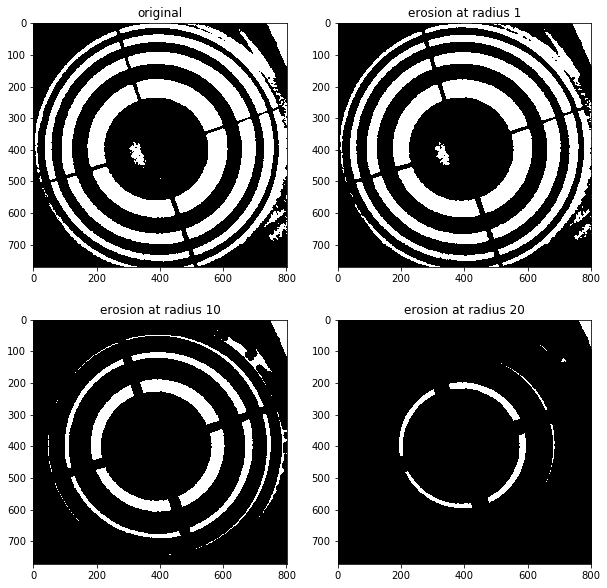

In [3]:
from skimage.morphology import disk
from skimage.morphology import erosion

finding_coloursPath = "./images/FindingContours.png"
finding_contours = io.imread(finding_coloursPath)
io.imshow(finding_contours)


fc_erosion1 = erosion(finding_contours,disk(1))
fc_erosion2 = erosion(finding_contours,disk(10))
fc_erosion3 = erosion(finding_contours,disk(20))

fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow(finding_contours, cmap=cm.gray)
ax0.set_title('original')
ax1.imshow(fc_erosion1, cmap=cm.gray)
ax1.set_title('erosion at radius 1')
ax2.imshow(fc_erosion2, cmap=cm.gray)
ax2.set_title('erosion at radius 10')
ax3.imshow(fc_erosion3, cmap=cm.gray)
ax3.set_title('erosion at radius 20')


** Q.1.2 Dilation **

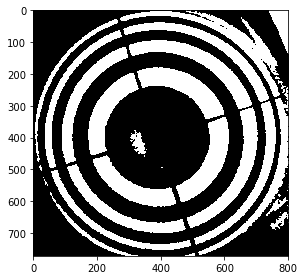

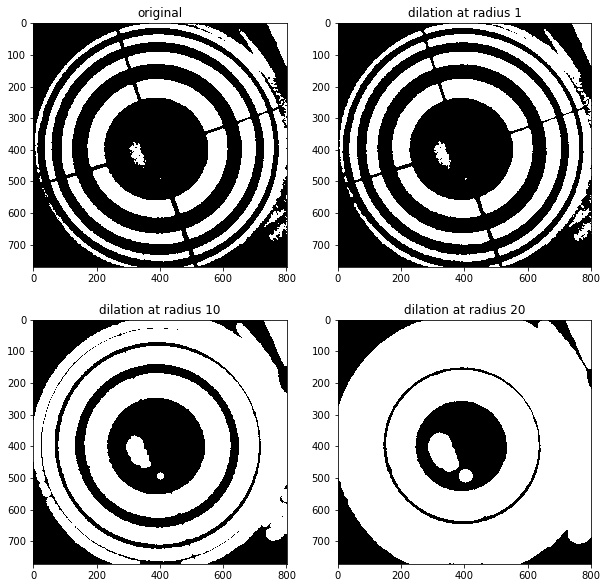

In [4]:
from skimage.morphology import disk
from skimage.morphology import dilation

finding_coloursPath = "./images/FindingContours.png"
finding_contours = io.imread(finding_coloursPath)
io.imshow(finding_contours)


fc_dilation1 = dilation(finding_contours,disk(1))
fc_dilation2 = dilation(finding_contours,disk(10))
fc_dilation3 = dilation(finding_contours,disk(20))

#plotting
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow(finding_contours, cmap=cm.gray)
ax0.set_title('original')
ax1.imshow(fc_dilation1, cmap=cm.gray)
ax1.set_title('dilation at radius 1')
ax2.imshow(fc_dilation2, cmap=cm.gray)
ax2.set_title('dilation at radius 10')
ax3.imshow(fc_dilation3, cmap=cm.gray)
ax3.set_title('dilation at radius 20')

** Q.1.3 Opening **

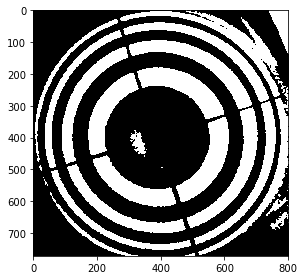

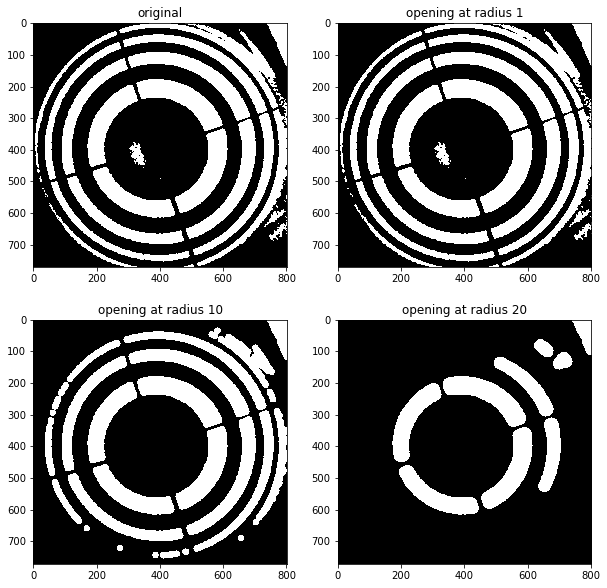

In [5]:
from skimage.morphology import disk
from skimage.morphology import opening

finding_coloursPath = "./images/FindingContours.png"
finding_contours = io.imread(finding_coloursPath)
io.imshow(finding_contours)


fc_opening1 = opening(finding_contours,disk(1))
fc_opening2 = opening(finding_contours,disk(10))
fc_opening3 = opening(finding_contours,disk(20))

#plotting
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow(finding_contours, cmap=cm.gray)
ax0.set_title('original')
ax1.imshow(fc_opening1, cmap=cm.gray)
ax1.set_title('opening at radius 1')
ax2.imshow(fc_opening2, cmap=cm.gray)
ax2.set_title('opening at radius 10')
ax3.imshow(fc_opening3, cmap=cm.gray)
ax3.set_title('opening at radius 20')

** Q.1.4 Closing**

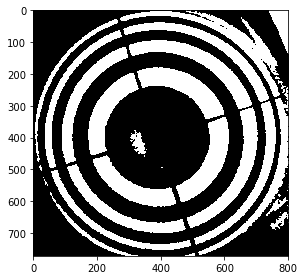

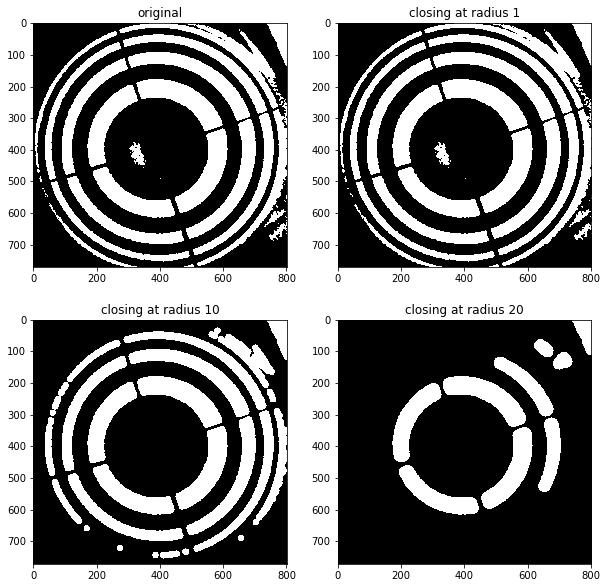

In [6]:
from skimage.morphology import disk
from skimage.morphology import closing

finding_coloursPath = "./images/FindingContours.png"
finding_contours = io.imread(finding_coloursPath)
io.imshow(finding_contours)


fc_closing1 = opening(finding_contours,disk(1))
fc_closing2 = opening(finding_contours,disk(10))
fc_closing3 = opening(finding_contours,disk(20))

#plotting
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow(finding_contours, cmap=cm.gray)
ax0.set_title('original')
ax1.imshow(fc_closing1, cmap=cm.gray)
ax1.set_title('closing at radius 1')
ax2.imshow(fc_closing2, cmap=cm.gray)
ax2.set_title('closing at radius 10')
ax3.imshow(fc_closing3, cmap=cm.gray)
ax3.set_title('closing at radius 20')

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

/opt/anaconda/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


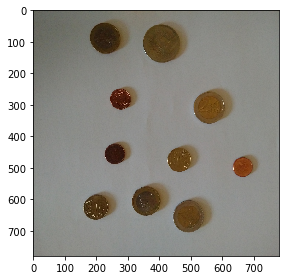

In [7]:
coinsPath = "./images/coins.jpg"
coins = io.imread(coinsPath)
newcoins = rescale(coins, .25)
io.imshow(newcoins)

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

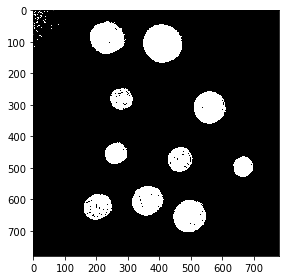

In [8]:
from skimage import filters
from skimage.filters import threshold_otsu

#convert to grayscale
coins_grey = rgb2gray(newcoins)

threshold_global_otsu = threshold_otsu(coins_grey)
global_otsu = coins_grey <= threshold_global_otsu


io.imshow(global_otsu)


**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

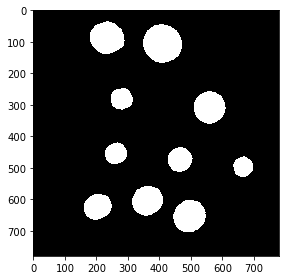

In [9]:
from skimage.morphology import disk
from skimage.morphology import opening
from skimage.morphology import closing

global_otsu1 = opening(global_otsu, disk(1))
global_otsu2 = closing(global_otsu1, disk(10))
global_otsu3 = opening(global_otsu2, disk(10))
global_otsu4 = closing(global_otsu3, disk(10))
global_otsu5 = opening(global_otsu4, disk(10))

io.imshow(global_otsu3)

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


Number of coins =  10
The equivalent diameter of one coin is: 105.459695729
The equivalent diameter of one coin is: 122.666804555
The equivalent diameter of one coin is: 69.8137592259
The equivalent diameter of one coin is: 101.453775088
The equivalent diameter of one coin is: 69.2460838277
The equivalent diameter of one coin is: 77.8336286823
The equivalent diameter of one coin is: 63.6309810726
The equivalent diameter of one coin is: 96.1773637219
The equivalent diameter of one coin is: 84.8463103849
The equivalent diameter of one coin is: 102.452851628


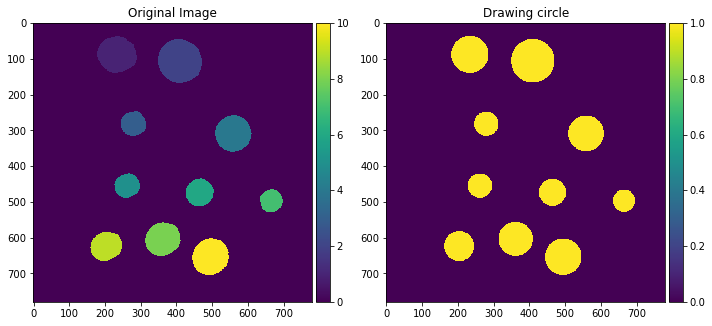

In [25]:
from skimage.measure import label
from skimage.measure import regionprops
from skimage.draw import circle

coins_label, num = label(global_otsu3, return_num = True)
coins_regions = regionprops(coins_label)
coin_mask = np.zeros_like(coins_label)

#io.imshow(coins_label)
print("Number of coins = ",num)


#get diameter of each coin
for region in coins_regions:
    print ("The equivalent diameter of one coin is:",region.equivalent_diameter)
    rad,cen = region.centroid
    rad1, cen1 = circle(int(rad), int(cen), int(region.equivalent_diameter/2))
    coin_mask[rad1, cen1] = 1
    
#plot
fig = plt.figure(figsize= (10, 10))
plt.subplot(121)
plt.title('Original Image')
io.imshow(coins_label)
plt.subplot(122)
plt.title('Drawing circle')
io.imshow(coin_mask)






### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 